In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import layers, models
import tensorflow as tf 


import matplotlib.pyplot as plt



In [2]:
IMAGE_SIZE = 128
BATCH_SIZE = 100

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
# loading train and test dataset

train_ds_ = tf.keras.utils.image_dataset_from_directory(
    directory='./Data/train/',
    image_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
    )

Found 16000 files belonging to 2 classes.


In [5]:
test_ds = tf.keras.utils.image_dataset_from_directory(
            directory='./Data/test/',
            image_size= (IMAGE_SIZE, IMAGE_SIZE), 
            batch_size=BATCH_SIZE, 
            shuffle=True)

Found 11558 files belonging to 2 classes.


In [6]:
class_names = train_ds_.class_names
print(class_names)

['Parasitized', 'Uninfected']


In [7]:
class_names = test_ds.class_names
print(class_names)

['Parasitized', 'Uninfected']


In [8]:
len(train_ds_)

160

In [9]:
# splitting train data into train and validation dataset
train_size  = 0.8
int(len(train_ds_)*train_size)

128

In [10]:
train_ds = train_ds_.take(int(len(train_ds_)*train_size)) # it same as array[:400] same as array slicing
len(train_ds)

128

In [11]:
validation_ds = train_ds_.skip(int(len(train_ds_)*train_size))
len(validation_ds)

32

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [13]:
resize_rescale = tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])



In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
kernal_size = (3,3)
EPOCHS = 10
input_shape

(100, 128, 128, 3)

In [15]:

model = models.Sequential([
    
    resize_rescale,
    
    # first layer
    Conv2D(32, kernel_size = kernal_size, 
           activation = 'relu', input_shape = input_shape),
    
    
    # second layer
    Conv2D(64, kernel_size = kernal_size,
            activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    # third layer
    Conv2D(64, kernel_size = kernal_size,
            activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    # fourth layer
    Conv2D(128, kernel_size = kernal_size,
            activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # fifth layer
    layers.Conv2D(256, 
                  kernel_size = (3,3), 
                  activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
    
    
])




In [16]:
model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (100, 128, 128, 3)        0         
                                                                 
 conv2d (Conv2D)             (100, 126, 126, 32)       896       
                                                                 
 conv2d_1 (Conv2D)           (100, 124, 124, 64)       18496     
                                                                 
 max_pooling2d (MaxPooling2D  (100, 62, 62, 64)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (100, 60, 60, 64)         36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (100, 30, 30, 64)        0         
 2D)                                                  

In [18]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [ ]:
with tf.device('/GPU:0'):
    model_hist = model.fit(
            train_ds_, 
            batch_size=BATCH_SIZE,
            validation_data=test_ds,
             verbose=1,
            epochs=EPOCHS)

Epoch 1/10
 32/160 [=====>........................] - ETA: 1:46 - loss: 0.6975 - accuracy: 0.5091

In [ ]:
scores = model.evaluate(test_ds)
scores

--this score contains **[loss_value,  accuracy_value]**<br>
-- So our model provides almost **95% accuracy**

In [ ]:
model_hist

In [ ]:
model_hist.params

In [ ]:
model_hist.history.keys()

In [ ]:
model_hist.history['loss']

In [43]:
model_hist.history['val_loss']

[0.16476549208164215,
 0.14664237201213837,
 0.13811510801315308,
 0.13376614451408386,
 0.1407664567232132,
 0.13620473444461823,
 0.1301605999469757,
 0.13253717124462128,
 0.1316307634115219,
 0.16695435345172882]

In [44]:
model_hist.history['accuracy']

[0.8556249737739563,
 0.9501875042915344,
 0.9549375176429749,
 0.9570000171661377,
 0.9599999785423279,
 0.9608749747276306,
 0.9635000228881836,
 0.9655625224113464,
 0.968625009059906,
 0.9710000157356262]

In [45]:
model_hist.history['val_accuracy']

[0.9528465270996094,
 0.9467035531997681,
 0.9538847804069519,
 0.9577781558036804,
 0.9542308449745178,
 0.9554421305656433,
 0.9593355059623718,
 0.956220805644989,
 0.9581242203712463,
 0.956393837928772]

In [46]:
train_acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']

train_loss = model_hist.history['loss']

val_loss = model_hist.history['val_loss']

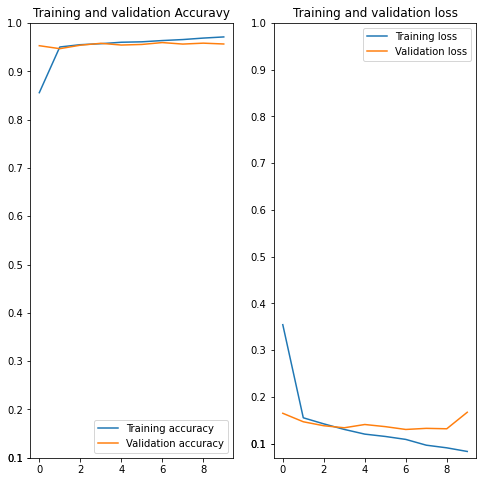

In [48]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)

plt.plot(range(EPOCHS), train_acc, label='Training accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation accuracy')
plt.title('Training and validation Accuravy')
plt.legend(loc='lower right')
plt.yticks([0.1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.subplot(1,2,2)

plt.plot(range(EPOCHS), train_loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.yticks([0.1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

plt.show()

first image to predict
actual label: Parasitized
predicted label: Parasitized


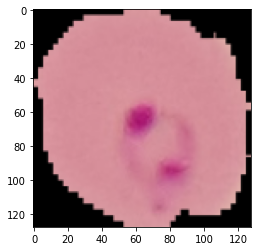

In [84]:
import numpy as np

for image_batch, label_batch in test_ds.take(1):
    
    # reading first image from batch
    first_image = image_batch[0].numpy().astype('uint8')
    
    # reading first image label from batch
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])